In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import qutip
import theano
import theano.tensor as T
from collections import OrderedDict
import itertools
import os
import sys

src_dir = os.path.join(os.getcwd(), os.pardir, 'src')
sys.path.append(src_dir)

from qubit_network.QubitNetwork import QubitNetwork
import qubit_network as qn
from qubit_network.net_analysis_tools import *

from utils import *

pairs = list(itertools.combinations(range(4), 2))

Nets implementing the Fredkin gate that have already been computed:

In [7]:
import glob
glob.glob('../data/nets/fredkin*')

['../data/nets/fredkin.pickle',
 '../data/nets/fredkin_good.pickle',
 '../data/nets/fredkin_3q+1a_paperTopology_1fid.pickle',
 '../data/nets/fredkin_shit.pickle',
 '../data/nets/fredkin_best.pickle',
 '../data/nets/fredkin_3q+1a_allpairs_z_0.996fid.pickle',
 '../data/nets/fredkin_Banchietal.pickle']

### A Fredkin gate is be obtained with very good fidelity, $\simeq 99.999\%$, starting with all interactions on, and only $\sigma_z$ operators as self-interactions.

Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


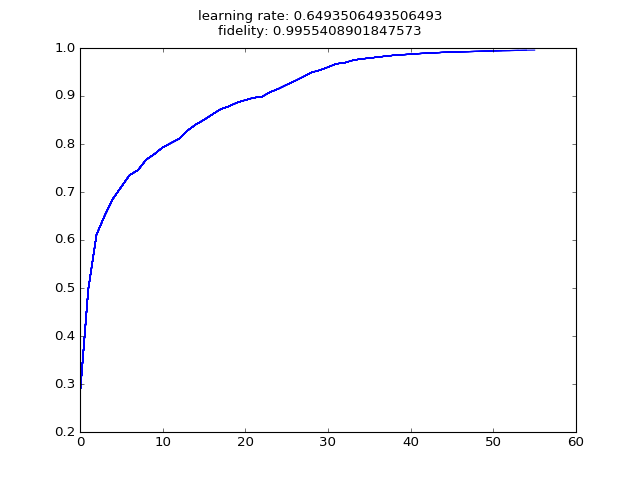

Finished training
Final fidelity: 0.9952059852258164


In [200]:
net = QubitNetwork(
    num_qubits=4,
    system_qubits=3,
    interactions=('all', ['xx', 'xy', 'xz', 'yx', 'yy', 'yz', 'zx', 'zy', 'zz', 'z'])
#     J=new_Jvalues
)
sgd_optimization(
    net=net,
    learning_rate=1,
    n_epochs=200,
    batch_size=10,
    target_gate=qutip.fredkin(),
    training_dataset_size=100,
    test_dataset_size=1000,
    decay_rate=.01
#     saveafter_file='nets/fredkin_best.pickle'
)

In [214]:
net = load_network_from_file('nets/fredkin_best.pickle')
print('Fidelity: {}'.format(net.test_fidelity(n_samples=100)))
print_OrderedDict(net.get_interactions_with_Js())

Fidelity: 0.9999888243221936
{
    "(0, 'z')": -0.000333662301860085,
    "(1, 'z')": 6.295873063114542e-06,
    "(2, 'z')": -1.5789920842045073e-05,
    "(3, 'z')": 9.579454270364572e-05,
    "((0, 1), 'xx')": 0.34863724024265735,
    "((0, 1), 'xy')": 0.9582706440463985,
    "((0, 1), 'xz')": -3.3168073500153623,
    "((0, 1), 'yx')": 0.049602796808803765,
    "((0, 1), 'yy')": 0.2445595864036591,
    "((0, 1), 'yz')": -0.6908267943759873,
    "((0, 1), 'zx')": 0.32337908613543886,
    "((0, 1), 'zy')": 0.6556094754906853,
    "((0, 1), 'zz')": -1.8126523913711574,
    "((0, 2), 'xx')": 0.34762401063088344,
    "((0, 2), 'xy')": 0.9569518933450241,
    "((0, 2), 'xz')": -3.3158612784831463,
    "((0, 2), 'yx')": 0.049377162135457106,
    "((0, 2), 'yy')": 0.24368691265262135,
    "((0, 2), 'yz')": -0.6885749523511139,
    "((0, 2), 'zx')": -0.027830549638016466,
    "((0, 2), 'zy')": -0.24381668335866902,
    "((0, 2), 'zz')": 1.0724723104243927,
    "((0, 3), 'xx')": -0.968272064160

##### We get in this case a Fredkin if the ancilla is 0, and a Fredkin with opposite control if the ancilla is 1:

In [225]:
proj0 = qutip.tensor(qutip.qeye(2), qutip.qeye(2), qutip.qeye(2), qutip.projection(2, 0, 0))
proj1 = qutip.tensor(qutip.qeye(2), qutip.qeye(2), qutip.qeye(2), qutip.projection(2, 1, 1))
gate = qutip.Qobj(net.get_current_gate(), dims=[[2, 2, 2, 2]] * 2)

gate0 = chop((proj0 * gate * proj0).ptrace([0, 1, 2]))
gate0 = gate0 * np.exp(-1j * np.angle(gate0[0, 0]))
display(chop(gate0))

gate1 = chop((proj1 * gate * proj1).ptrace([0, 1, 2]))
gate1 = gate1 * np.exp(-1j * np.angle(gate1[0, 0]))
display(chop(gate1))

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = False
Qobj data =
[[ 0.99999506+0.j          0.00000000+0.j          0.00000000+0.j
  -0.00122103+0.j          0.00000000+0.j          0.00000000+0.j
   0.00000000+0.j          0.00000000+0.j        ]
 [ 0.00000000+0.j          0.99998824+0.j          0.00000000+0.j
   0.00000000+0.j          0.00000000+0.j          0.00000000+0.j
   0.00000000+0.j          0.00000000+0.j        ]
 [ 0.00000000+0.j          0.00000000+0.j          0.99998861+0.j
   0.00000000+0.j          0.00000000+0.j          0.00000000+0.j
   0.00000000+0.j          0.00000000+0.j        ]
 [ 0.00000000-0.00104559j  0.00000000+0.j          0.00000000+0.j
   0.99999563+0.j          0.00000000+0.j          0.00000000+0.j
   0.00000000+0.j          0.00000000+0.j        ]
 [ 0.00000000+0.j          0.00000000+0.j          0.00000000+0.j
   0.00000000+0.j          0.99999552+0.j          0.00000000+0.j
   0.00000000+0.j          0.0012

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = False
Qobj data =
[[ 0.99999625+0.j          0.00000000+0.j          0.00000000+0.j
   0.00123388+0.j          0.00000000+0.j          0.00000000+0.j
   0.00000000+0.j          0.00000000+0.j        ]
 [ 0.00000000+0.j          0.00000000+0.j          0.99999563+0.j
   0.00000000+0.j          0.00000000+0.j          0.00000000+0.j
   0.00000000+0.j          0.00000000+0.j        ]
 [ 0.00000000+0.j          0.99999540+0.j          0.00000000+0.j
   0.00000000+0.j          0.00000000+0.j          0.00000000+0.j
   0.00000000+0.j          0.00000000+0.j        ]
 [ 0.00000000+0.00104826j  0.00000000+0.j          0.00000000+0.j
   0.99999551+0.j          0.00000000+0.j          0.00000000+0.j
   0.00000000+0.j          0.00000000+0.j        ]
 [ 0.00000000+0.j          0.00000000+0.j          0.00000000+0.j
   0.00000000+0.j          0.99999554+0.j          0.00000000+0.j
   0.00000000+0.j         -0.0012

In [5]:
net.J.get_value()

array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan])

[  8.98313281   8.37969149   9.3537639   10.8586698   11.88921396
   9.97753264   7.42805175   8.74198587  10.05316449   8.54294651
   9.89007296  10.46046354  10.09464282  10.48210736   8.97893472
   9.99305808]
Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


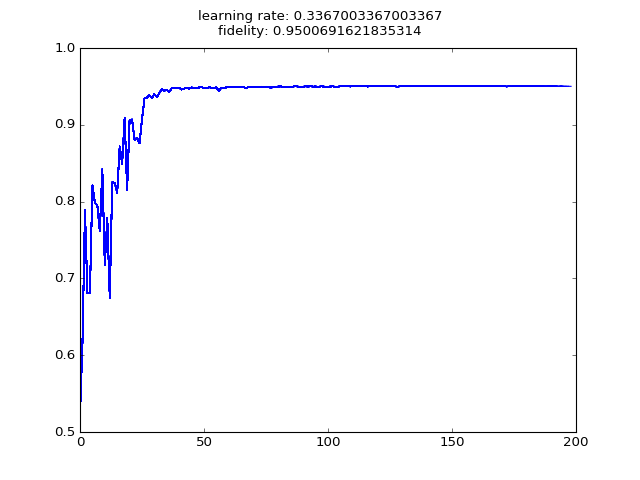

Finished training
Final fidelity: 0.9457288653266597


In [7]:
net = QubitNetwork(
    num_qubits=4,
    system_qubits=3,
    interactions=('all', ['yy', 'zz', 'z'])
)
net.J.set_value(net.J.get_value() + 10. * np.ones_like(net.J.get_value()))
print(net.J.get_value())
sgd_optimization(
    net=net,
    learning_rate=1,
    n_epochs=1000,
    batch_size=10,
    target_gate=qutip.fredkin(),
    training_dataset_size=100,
    test_dataset_size=1000,
    decay_rate=.01
)

Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


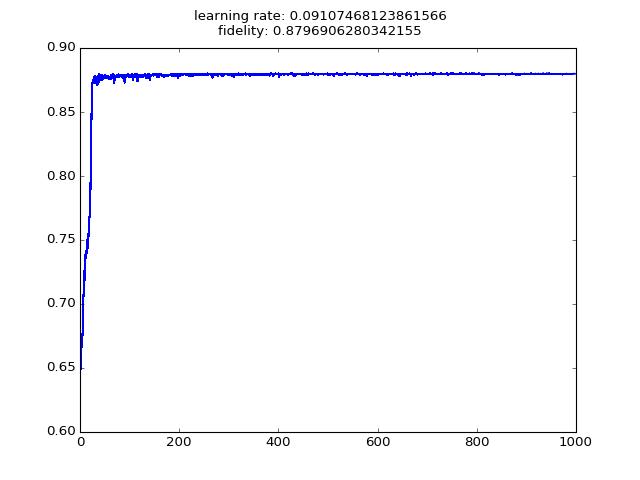

Finished training


In [180]:
net = QubitNetwork(
    num_qubits=4,
    system_qubits=3,
    interactions=('all', ['yy', 'zz', 'z'])
)
sgd_optimization(
    net=net,
    learning_rate=1,
    n_epochs=1000,
    batch_size=10,
    target_gate=qutip.fredkin(),
    training_dataset_size=100,
    test_dataset_size=1000,
    decay_rate=.01
)

Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


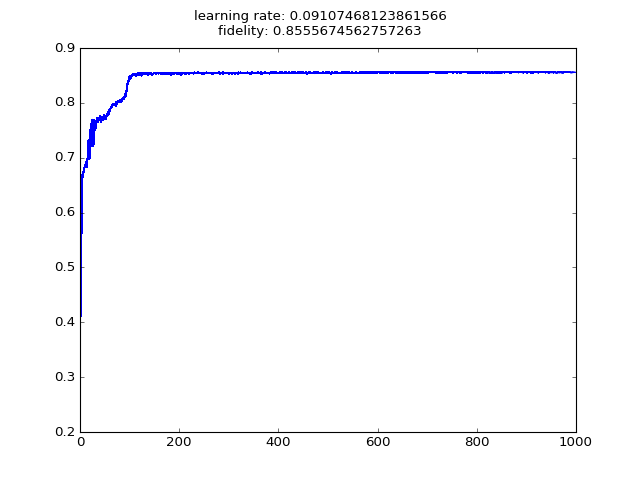

Finished training


In [182]:
net = QubitNetwork(
    num_qubits=4,
    system_qubits=3,
    interactions=('all', ['xx', 'yy', 'zz', 'x', 'y', 'z'])
)
sgd_optimization(
    net=net,
    learning_rate=1,
    n_epochs=1000,
    batch_size=10,
    target_gate=qutip.fredkin(),
    training_dataset_size=100,
    test_dataset_size=1000,
    decay_rate=.01
)

Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


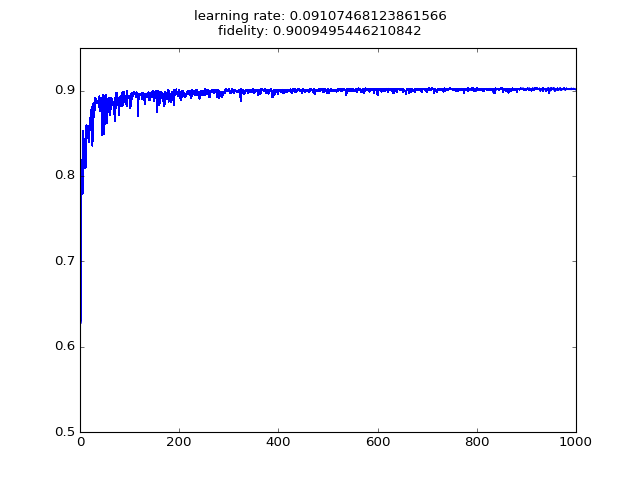

Finished training


In [184]:
net = QubitNetwork(
    num_qubits=4,
    system_qubits=3,
    interactions=('all', ['xx', 'yy', 'zz', 'xy', 'x', 'y', 'z'])
)
sgd_optimization(
    net=net,
    learning_rate=1,
    n_epochs=1000,
    batch_size=2,
    target_gate=qutip.fredkin(),
    training_dataset_size=100,
    test_dataset_size=1000,
    decay_rate=.01
)

<IPython.core.display.Javascript object>


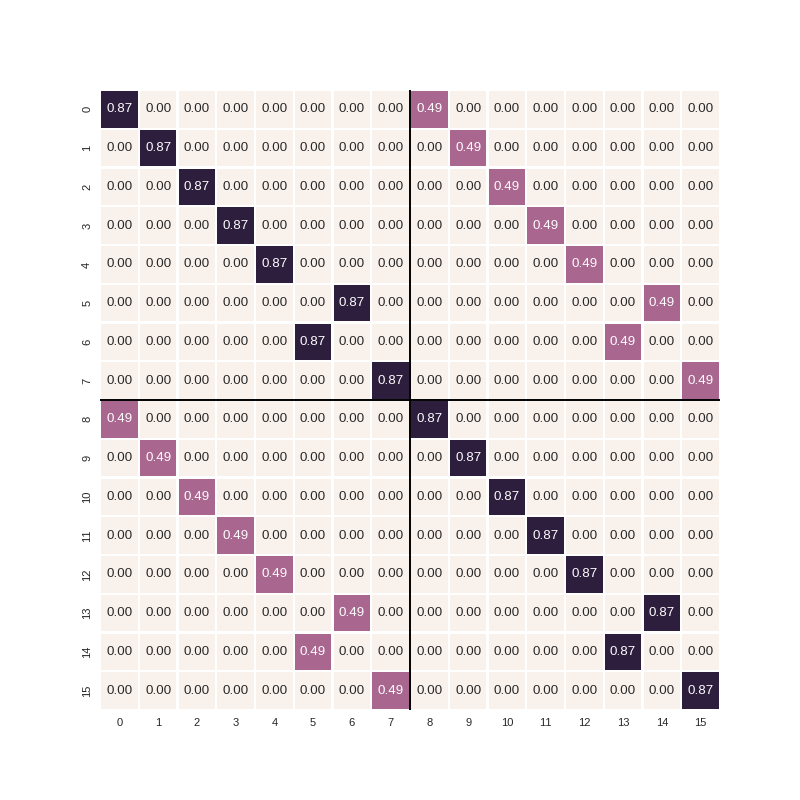

<IPython.core.display.Javascript object>


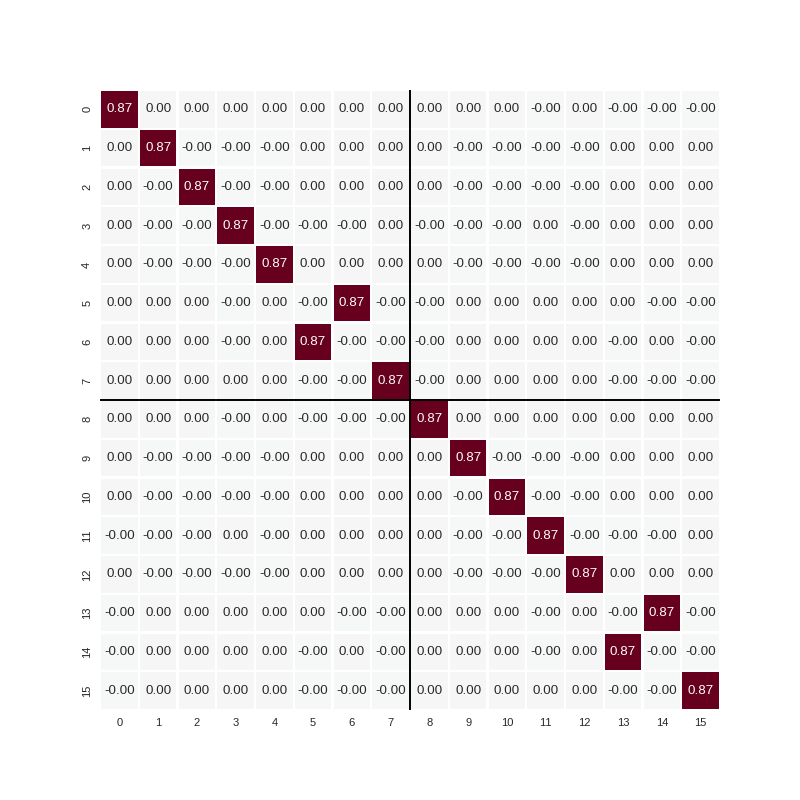

<IPython.core.display.Javascript object>


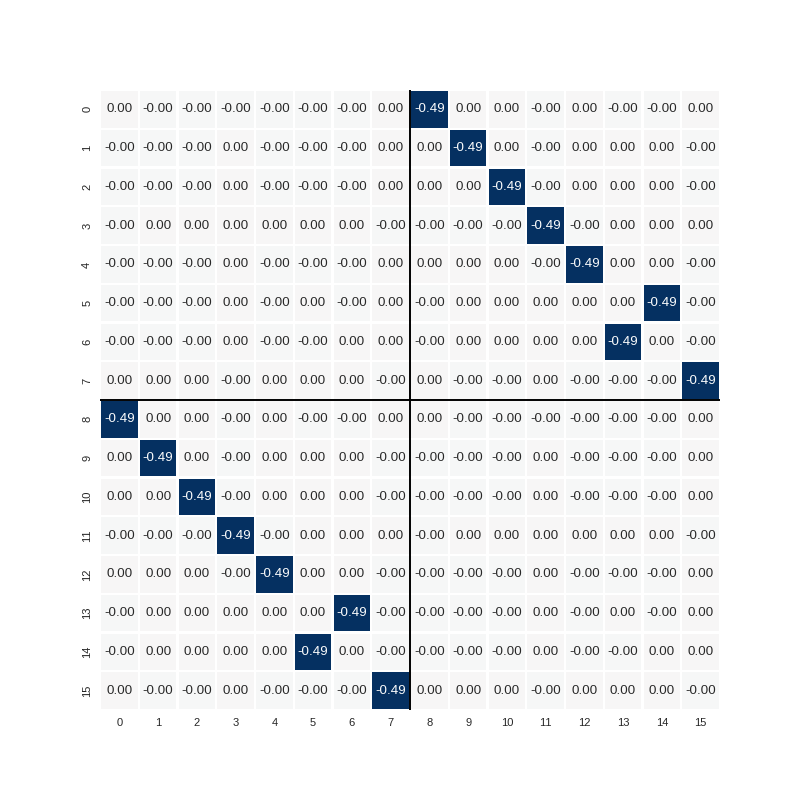

In [15]:
net = qn.load_network_from_file('../data/nets/fredkin_Banchietal.pickle')
plot_gate(net, permutation=[3, 0, 1, 2], func='abs')
plot_gate(net, permutation=[3, 0, 1, 2], func='real')
plot_gate(net, permutation=[3, 0, 1, 2], func='imag')

<IPython.core.display.Javascript object>


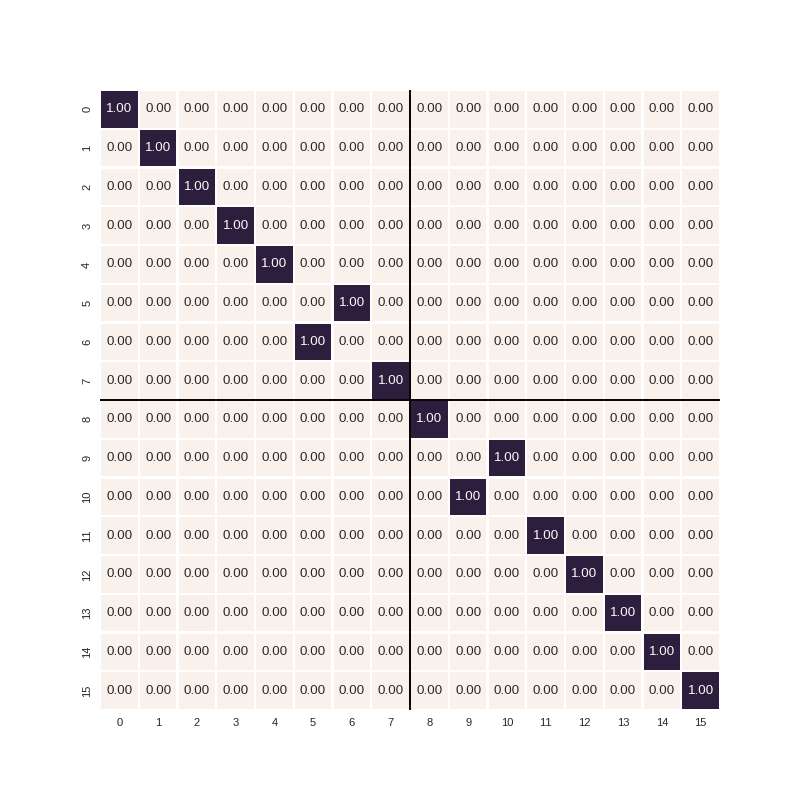

In [6]:
net = qn.load_network_from_file('../data/nets/fredkin_best.pickle')
plot_gate(net, permutation=[3, 0, 1, 2])

In [134]:
Jvalues = net.J.get_value()
display(Jvalues)
# [net.J_index_to_interaction(v) for v in np.where(np.abs(Jvalues) < 1e-3)[0]]
# net.active_hs
Jvalues[[net.tuple_to_xs_index(((0, 2), 'xy')), net.tuple_to_xs_index(((1, 2), 'xy'))]]

array([ -3.33662302e-04,   6.29587306e-06,  -1.57899208e-05,
         9.57945427e-05,   3.48637240e-01,   9.58270644e-01,
        -3.31680735e+00,   4.96027968e-02,   2.44559586e-01,
        -6.90826794e-01,   3.23379086e-01,   6.55609475e-01,
        -1.81265239e+00,   3.47624011e-01,   9.56951893e-01,
        -3.31586128e+00,   4.93771621e-02,   2.43686913e-01,
        -6.88574952e-01,  -2.78305496e-02,  -2.43816683e-01,
         1.07247231e+00,  -9.68272064e-01,  -1.22447583e+00,
        -8.84021718e-04,   1.24402550e+00,  -9.69491489e-01,
         1.16198049e-03,   1.27472394e-03,   5.27919157e-03,
         2.35810340e+00,   7.67137183e-01,  -4.07293974e-02,
         1.72312350e-01,  -4.08734884e-02,   6.57406318e-01,
         4.79221787e-01,   1.73037299e-01,   4.79996568e-01,
        -1.03380509e+00,  -9.43497636e-02,  -9.22462741e-02,
         1.55768464e-01,  -1.02434314e-01,  -2.73949437e-01,
         4.65624355e-01,   4.73042385e-01,   9.47372533e-01,
        -1.61224118e+00,

array([ 0.32337909,  0.00127472])

In [177]:
groups = utils.group_similar_elements(Jvalues)
groups = [g for g in groups if len(g) > 1]

[[net.J_index_to_interaction(i) for i in groups[j]] for j in range(len(groups))]

[[(0, 'z'), (1, 'z'), (2, 'z'), (3, 'z'), ((0, 3), 'xz')],
 [((0, 1), 'xz'), ((0, 2), 'xz')],
 [((0, 1), 'yx'), ((0, 2), 'yx')],
 [((0, 1), 'yy'), ((0, 2), 'yy')],
 [((0, 3), 'yz'), ((0, 3), 'zx')],
 [((1, 2), 'xy'), ((1, 2), 'yx')],
 [((1, 2), 'xz'), ((1, 2), 'zx')],
 [((1, 2), 'yz'), ((1, 2), 'zy')],
 [((1, 3), 'xx'), ((2, 3), 'xx')],
 [((1, 3), 'xy'), ((2, 3), 'xy')],
 [((1, 3), 'yx'), ((2, 3), 'yx')]]